In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset/movies_complete.csv


In [2]:
df = pd.read_csv('/kaggle/input/movies-dataset/movies_complete.csv',parse_dates=['release_date'])

In [3]:
df

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,439050,Subdue,Rising and falling between a man and woman,NaT,Drama|Family,NaN,fa,NaN,NaN,NaN,...,4.0,0.072051,90.0,Rising and falling between a man and woman.,فارسی,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Leila Hatami|Kourosh Tahami|Elham Korda,3,9,Hamid Nematollah
44687,111109,Century of Birthing,NaN,2011-11-17,Drama,NaN,tl,NaN,NaN,Sine Olivia,...,9.0,0.178241,360.0,An artist struggles to finish his work while a...,NaN,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...,11,6,Lav Diaz
44688,67758,Betrayal,A deadly game of wits.,2003-08-01,Action|Drama|Thriller,NaN,en,NaN,NaN,American World Pictures,...,3.8,0.903007,90.0,"When one of her hits goes wrong, a professiona...",English,<img src='http://image.tmdb.org/t/p/w185//eGga...,Erika Eleniak|Adam Baldwin|Julie du Page|James...,15,5,Mark L. Lester
44689,227506,Satan Triumphant,NaN,1917-10-21,NaN,NaN,en,NaN,NaN,Yermoliev,...,NaN,0.003503,87.0,"In a small town live two brothers, one a minis...",NaN,<img src='http://image.tmdb.org/t/p/w185//aorB...,Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...,5,2,Yakov Protazanov


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     44691 non-null  int64         
 1   title                  44691 non-null  object        
 2   tagline                20284 non-null  object        
 3   release_date           44657 non-null  datetime64[ns]
 4   genres                 42586 non-null  object        
 5   belongs_to_collection  4463 non-null   object        
 6   original_language      44681 non-null  object        
 7   budget_musd            8854 non-null   float64       
 8   revenue_musd           7385 non-null   float64       
 9   production_companies   33356 non-null  object        
 10  production_countries   38835 non-null  object        
 11  vote_count             44691 non-null  float64       
 12  vote_average           42077 non-null  float64       
 13  p

In [5]:
df.genres

0         Animation|Comedy|Family
1        Adventure|Fantasy|Family
2                  Romance|Comedy
3            Comedy|Drama|Romance
4                          Comedy
                   ...           
44686                Drama|Family
44687                       Drama
44688       Action|Drama|Thriller
44689                         NaN
44690                         NaN
Name: genres, Length: 44691, dtype: object

In [6]:
df.cast

0        Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
1        Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
2        Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...
3        Whitney Houston|Angela Bassett|Loretta Devine|...
4        Steve Martin|Diane Keaton|Martin Short|Kimberl...
                               ...                        
44686              Leila Hatami|Kourosh Tahami|Elham Korda
44687    Angel Aquino|Perry Dizon|Hazel Orencio|Joel To...
44688    Erika Eleniak|Adam Baldwin|Julie du Page|James...
44689    Iwan Mosschuchin|Nathalie Lissenko|Pavel Pavlo...
44690                                                  NaN
Name: cast, Length: 44691, dtype: object

In [7]:
df.describe()

,id,release_date,budget_musd,revenue_musd,vote_count,vote_average,popularity,runtime,cast_size,crew_size
count,44691.000000,44657,8854.000000,7385.000000,44691.000000,42077.000000,44691.000000,43179.000000,44691.000000,44691.000000
mean,107186.242845,1992-04-28 16:30:02.539355520,21.669886,68.968649,111.653778,6.003341,2.957460,97.566850,12.479090,10.313643
min,2.000000,1874-12-09 00:00:00,0.000001,0.000001,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,26033.500000,1978-08-12 00:00:00,2.000000,2.405420,3.000000,5.300000,0.402038,86.000000,6.000000,2.000000
50%,59110.000000,2001-08-16 00:00:00,8.200000,16.872671,10.000000,6.100000,1.150055,95.000000,10.000000,6.000000
75%,154251.000000,2010-12-10 00:00:00,25.000000,67.642693,35.000000,6.800000,3.768882,107.000000,15.000000,12.000000
max,469172.000000,2017-12-27 00:00:00,380.000000,2787.965087,14075.000000,10.000000,547.488298,1256.000000,313.000000,435.000000
std,111806.362236,NaN,34.359837,146.608966,495.322313,1.281060,6.040008,34.653409,12.124663,15.892154


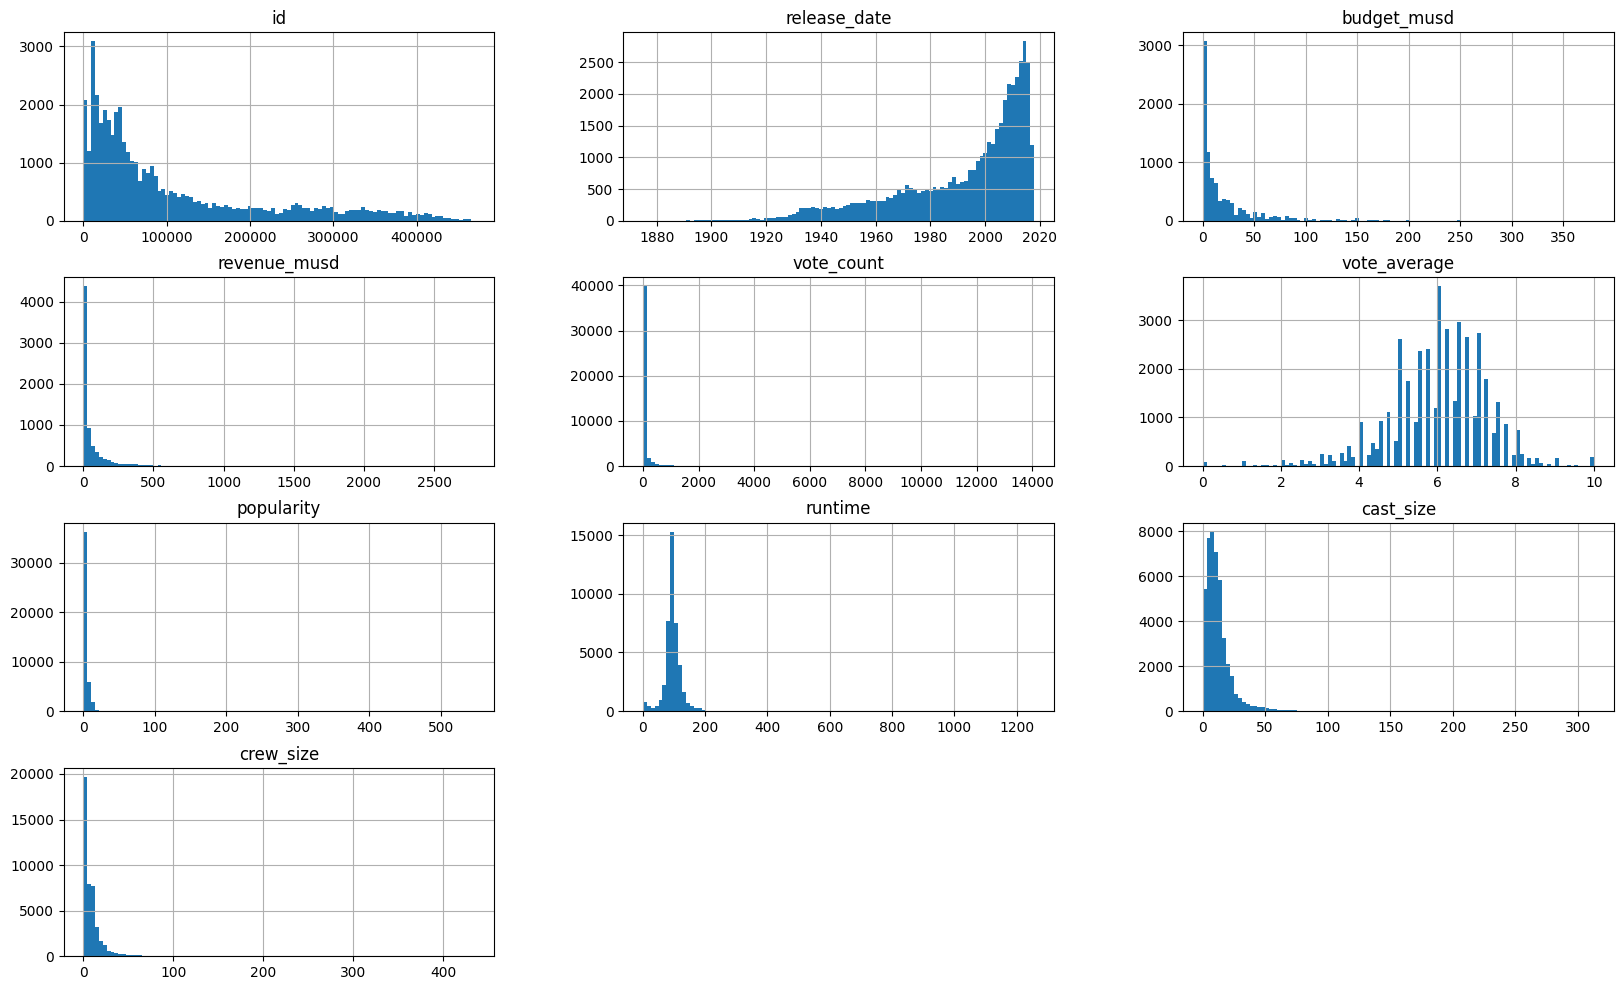

In [8]:
df.hist(figsize=(20,12),bins=100)
plt.show()

In [9]:
df.budget_musd.value_counts(dropna=False).head(20)

budget_musd
NaN     35837
5.0       286
10.0      258
20.0      243
2.0       241
15.0      226
3.0       220
25.0      206
1.0       195
30.0      189
4.0       180
6.0       173
12.0      171
40.0      166
8.0       155
35.0      141
0.5       141
7.0       137
50.0      124
1.5       119
Name: count, dtype: int64

In [10]:
df.revenue_musd.value_counts(dropna=False).head(20)

revenue_musd
NaN          37306
12.000000       20
10.000000       19
11.000000       19
2.000000        18
6.000000        17
5.000000        14
0.500000        13
8.000000        13
0.000001        12
14.000000       12
7.000000        11
3.000000        10
1.000000        10
20.000000       10
0.000003         9
1.500000         9
4.000000         9
30.000000        8
4.100000         8
Name: count, dtype: int64

In [11]:
df.vote_average.value_counts(dropna=False).head(20)

vote_average
NaN    2614
6.0    2421
5.0    1969
7.0    1859
6.5    1705
6.3    1583
5.5    1369
5.8    1358
6.4    1343
6.7    1328
6.8    1316
6.1    1274
6.6    1250
6.2    1240
5.9    1189
5.3    1068
5.7    1039
6.9    1029
5.6     994
7.3     987
Name: count, dtype: int64

In [12]:
df.vote_count.value_counts()

vote_count
1.0       3186
2.0       3056
3.0       2729
0.0       2614
4.0       2442
          ... 
2755.0       1
1187.0       1
4200.0       1
3322.0       1
2712.0       1
Name: count, Length: 1820, dtype: int64

In [13]:
df.describe(include='O')

,title,tagline,genres,belongs_to_collection,original_language,production_companies,production_countries,overview,spoken_languages,poster_path,cast,director
count,44691,20284,42586,4463,44681,33356,38835,43740,41094,44467,42502,43960
unique,41605,20171,4044,1691,89,22537,2377,43715,1828,44456,42166,17349
top,Cinderella,Based on a true story.,Drama,The Bowery Boys,en,Metro-Goldwyn-Mayer (MGM),United States of America,Adaptation of the Jane Austen novel.,English,<img src='http://image.tmdb.org/t/p/w185//qW1o...,Georges Méliès,John Ford
freq,11,7,4935,29,31755,741,17723,3,22189,3,24,66


In [14]:
df[df.title == 'Cinderella']

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
984,11224,Cinderella,The greatest love story ever told.,1950-03-04,Family|Fantasy|Animation|Romance,Cinderella Collection,en,2.9,263.591415,RKO Radio Pictures|Walt Disney Productions,...,6.8,14.436858,74.0,Cinderella has faith her dreams of a better li...,English,<img src='http://image.tmdb.org/t/p/w185//avz6...,Ilene Woods|Eleanor Audley|Lucille Bliss|Verna...,11,50,Clyde Geronimi
12988,42884,Cinderella,NaN,1997-11-02,TV Movie|Family|Fantasy|Music|Romance,NaN,en,NaN,NaN,Walt Disney Television|Citadel Entertainment|S...,...,6.1,2.102013,88.0,Updated version of the classic Rodgers and Ham...,English,<img src='http://image.tmdb.org/t/p/w185//54aw...,Brandy Norwood|Whitney Houston|Whoopi Goldberg...,5,1,Robert Iscove
23254,92349,Cinderella,NaN,1914-12-28,Fantasy|Drama,NaN,en,NaN,NaN,NaN,...,5.4,0.361288,52.0,Based on Charles Perrault's fairy tale: Cinder...,English,<img src='http://image.tmdb.org/t/p/w185//bL1K...,Mary Pickford|Owen Moore|Isabel Vernon|Georgia...,7,2,James Kirkwood
23265,105875,Cinderella,The version children love!,2002-08-06,Animation|Family|Fantasy,NaN,en,NaN,NaN,GoodTimes Entertainment,...,6.0,2.154873,48.0,"Cinderella, the beautiful and kind-hearted rag...",Afrikaans,<img src='http://image.tmdb.org/t/p/w185//rbzG...,Tony Ail|Nathan Aswell|Chera Bailey|Kathleen B...,7,3,Toshiyuki Hiruma
28073,261985,Cinderella,NaN,2011-10-30,Family|TV Movie,NaN,en,NaN,NaN,Beta Film|Lux Vide|ARD/Degeto Film GmbH|Rai Fi...,...,5.3,0.987462,180.0,Once upon a time in post-war Rome: 13-year old...,English,<img src='http://image.tmdb.org/t/p/w185//wjZK...,Vanessa Hessler|Flavio Parenti|Natalia Wörner|...,14,11,Christian Duguay
28340,150689,Cinderella,Midnight is just the beginning.,2015-03-12,Romance|Fantasy|Family|Drama,NaN,en,95.0,543.514353,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,...,6.7,19.801128,105.0,"When her father unexpectedly passes away, youn...",English,<img src='http://image.tmdb.org/t/p/w185//iH4C...,Lily James|Cate Blanchett|Richard Madden|Helen...,78,80,Kenneth Branagh
33805,42651,Cinderella,NaN,1947-11-28,Comedy|Family|Fantasy,NaN,ru,NaN,NaN,Lenfilm,...,4.8,0.486073,80.0,"Based on a classic fairytale ""Cinderella"" bril...",Pусский,<img src='http://image.tmdb.org/t/p/w185//p41r...,Yanina Zhejmo|Aleksei Konsovsky|Faina Ranevska...,6,4,Nadezhda Kosheverova
35114,44459,Cinderella,NaN,1957-03-31,Drama|Romance,NaN,en,NaN,NaN,NaN,...,5.9,0.209552,77.0,The first of three TV-versions of the classic ...,English,<img src='http://image.tmdb.org/t/p/w185//cB6I...,Julie Andrews|Howard Lindsay|Howard Lindsay|Il...,9,10,Ralph Nelson
35116,289673,Cinderella,NaN,2000-01-01,NaN,NaN,en,NaN,NaN,NaN,...,5.6,1.085134,90.0,Cinderella (named Zezolla) and her family live...,English,<img src='http://image.tmdb.org/t/p/w185//gMYk...,Kathleen Turner|Katrin Cartlidge|David Warner|...,10,6,Beeban Kidron
40439,114108,Cinderella,NaN,1899-10-01,Fantasy|Horror|Science Fiction|Family,NaN,fr,NaN,NaN,Star-Film|Georges Méliès,...,5.5,1.301063,5.0,A fairy godmother magically turns Cinderella's...,No Language,<img src='http://image.tmdb.org/t/p/w185//cf0g...,Georges Méliès|Barral|Bleuette Bernon|Carmely|...,6,2,Georges Méliès


# The best and the worst movies

In [15]:
from IPython.display import HTML

In [16]:
df_best = df[["poster_path",'title','budget_musd','revenue_musd','vote_count','vote_average','popularity']].copy()
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519
...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,NaN,NaN,1.0,4.0,0.072051
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.0,9.0,0.178241
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,NaN,NaN,6.0,3.8,0.903007
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.0,NaN,0.003503


In [17]:
df_best['profit_musd'] = df.revenue_musd.sub(df.budget_musd)
df_best['return'] = df.revenue_musd.div(df.budget_musd)

In [18]:
df_best

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,return
0,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Toy Story,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
1,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Jumanji,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
2,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Grumpier Old Men,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
3,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Waiting to Exhale,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
4,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Father of the Bride Part II,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN
...,...,...,...,...,...,...,...,...,...
44686,<img src='http://image.tmdb.org/t/p/w185//pfC8...,Subdue,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
44687,<img src='http://image.tmdb.org/t/p/w185//xZkm...,Century of Birthing,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
44688,<img src='http://image.tmdb.org/t/p/w185//eGga...,Betrayal,NaN,NaN,6.0,3.8,0.903007,NaN,NaN
44689,<img src='http://image.tmdb.org/t/p/w185//aorB...,Satan Triumphant,NaN,NaN,0.0,NaN,0.003503,NaN,NaN


In [19]:
df_best.columns = ['','Title','Budget','Revenue','Votes','Average_Rating','Popularity','Profit','ROI']

In [20]:
df_best.set_index("Title",inplace=True)

In [21]:
df_best

,,Budget,Revenue,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0,373.554033,5415.0,7.7,21.946943,343.554033,12.451801
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0,262.797249,2413.0,6.9,17.015539,197.797249,4.043035
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN,NaN,92.0,6.5,11.712900,NaN,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0,81.452156,34.0,6.1,3.859495,65.452156,5.090760
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN,76.578911,173.0,5.7,8.387519,NaN,NaN
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.0,3.8,0.903007,NaN,NaN


In [22]:
df_best.iloc[0,0]

"<img src='http://image.tmdb.org/t/p/w185//uXDfjJbdP4ijW5hWSBrPrlKpxab.jpg' style='height:100px;'>"

In [23]:
subset = df_best.iloc[:5,:2]
subset

,,Budget
Title,,
Toy Story,<img src='http://image.tmdb.org/t/p/w185//uXDf...,30.0
Jumanji,<img src='http://image.tmdb.org/t/p/w185//vgpX...,65.0
Grumpier Old Men,<img src='http://image.tmdb.org/t/p/w185//1FSX...,NaN
Waiting to Exhale,<img src='http://image.tmdb.org/t/p/w185//4wjG...,16.0
Father of the Bride Part II,<img src='http://image.tmdb.org/t/p/w185//lf9R...,NaN


In [24]:
HTML(subset.to_html(escape=False))

,,Budget
Title,,
Toy Story,,30.0
Jumanji,,65.0
Grumpier Old Men,,NaN
Waiting to Exhale,,16.0
Father of the Bride Part II,,NaN


In [25]:
df_best.sort_values(by='Average_Rating',ascending=False)

,,Budget,Revenue,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
Portrait of a Young Man in Three Movements,NaN,NaN,NaN,1.0,10.0,0.036471,NaN,NaN
Brave Revolutionary,<img src='http://image.tmdb.org/t/p/w185//zAb2...,NaN,NaN,1.0,10.0,0.318826,NaN,NaN
Other Voices Other Rooms,<img src='http://image.tmdb.org/t/p/w185//4ifP...,NaN,NaN,1.0,10.0,0.036680,NaN,NaN
The Lion of Thebes,<img src='http://image.tmdb.org/t/p/w185//tdOc...,NaN,NaN,1.0,10.0,1.783625,NaN,NaN
Katt Williams: Priceless: Afterlife,<img src='http://image.tmdb.org/t/p/w185//wKrH...,NaN,NaN,2.0,10.0,0.476007,NaN,NaN
...,...,...,...,...,...,...,...,...
Altar of Fire,<img src='http://image.tmdb.org/t/p/w185//iJ78...,NaN,NaN,0.0,NaN,0.000000,NaN,NaN
The Wonders of Aladdin,<img src='http://image.tmdb.org/t/p/w185//AvfX...,NaN,NaN,0.0,NaN,0.093498,NaN,NaN
Deep Hearts,<img src='http://image.tmdb.org/t/p/w185//8jI4...,NaN,NaN,0.0,NaN,0.011025,NaN,NaN


In [26]:
df_best.sort_values(by='ROI',ascending=False)

,,Budget,Revenue,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
Less Than Zero,<img src='http://image.tmdb.org/t/p/w185//1GY0...,0.000001,12.396383,77.0,6.1,4.028679,12.396382,1.239638e+07
Modern Times,<img src='http://image.tmdb.org/t/p/w185//7uoi...,0.000001,8.500000,881.0,8.1,8.159556,8.499999,8.500000e+06
Welcome to Dongmakgol,<img src='http://image.tmdb.org/t/p/w185//5iGV...,0.000008,33.579813,49.0,7.7,4.222195,33.579805,4.197477e+06
Aquí Entre Nos,<img src='http://image.tmdb.org/t/p/w185//oflx...,0.000001,2.755584,3.0,6.0,0.230075,2.755583,2.755584e+06
"The Karate Kid, Part II",<img src='http://image.tmdb.org/t/p/w185//mSne...,0.000113,115.103979,457.0,5.9,9.231318,115.103866,1.018619e+06
...,...,...,...,...,...,...,...,...
Subdue,<img src='http://image.tmdb.org/t/p/w185//pfC8...,NaN,NaN,1.0,4.0,0.072051,NaN,NaN
Century of Birthing,<img src='http://image.tmdb.org/t/p/w185//xZkm...,NaN,NaN,3.0,9.0,0.178241,NaN,NaN
Betrayal,<img src='http://image.tmdb.org/t/p/w185//eGga...,NaN,NaN,6.0,3.8,0.903007,NaN,NaN


In [27]:
df_best.loc[df_best.Budget>=5].sort_values(by='ROI',ascending=False)

,,Budget,Revenue,Votes,Average_Rating,Popularity,Profit,ROI
Title,,,,,,,,
E.T. the Extra-Terrestrial,<img src='http://image.tmdb.org/t/p/w185//cBfk...,10.500000,792.965326,3359.0,7.3,19.358546,782.465326,75.520507
My Big Fat Greek Wedding,<img src='http://image.tmdb.org/t/p/w185//3TB2...,5.000000,368.744044,686.0,6.2,6.719949,363.744044,73.748809
Star Wars,<img src='http://image.tmdb.org/t/p/w185//6FfC...,11.000000,775.398007,6778.0,8.1,42.149697,764.398007,70.490728
Jaws,<img src='http://image.tmdb.org/t/p/w185//s2xc...,7.000000,470.654000,2628.0,7.5,19.726114,463.654000,67.236286
Crocodile Dundee,<img src='http://image.tmdb.org/t/p/w185//kiwO...,5.000000,328.203506,512.0,6.3,7.791212,323.203506,65.640701
...,...,...,...,...,...,...,...,...
The Blonde with Bare Breasts,<img src='http://image.tmdb.org/t/p/w185//zBjp...,7.500000,NaN,3.0,4.0,0.882188,NaN,NaN
Detroit,<img src='http://image.tmdb.org/t/p/w185//7APL...,34.000000,NaN,67.0,7.3,9.797505,NaN,NaN
"Good Guys Go to Heaven, Bad Guys Go to Pattaya",<img src='http://image.tmdb.org/t/p/w185//cfVB...,5.402000,NaN,153.0,5.3,5.613875,NaN,NaN


In [28]:
df_best.Budget.fillna(0,inplace=True)
df_best.Votes.fillna(0,inplace = True)

In [29]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44691 entries, Toy Story to Queerama
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   44467 non-null  object 
 1   Budget          44691 non-null  float64
 2   Revenue         7385 non-null   float64
 3   Votes           44691 non-null  float64
 4   Average_Rating  42077 non-null  float64
 5   Popularity      44691 non-null  float64
 6   Profit          5371 non-null   float64
 7   ROI             5371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 3.1+ MB


In [30]:
def best_worst(n,by,ascending=False,min_bud=0,min_votes=0):
    df2 = df_best.loc[(df_best.Budget >=min_bud) & (df_best.Votes >= min_votes),["",by]].sort_values(by=by,ascending=ascending).head(n).copy()
    return HTML(df2.to_html(escape=False))

In [31]:
#Movies Top-s Highest Revenue

best_worst(n=5,by='Revenue')

,,Revenue
Title,,
Avatar,,2787.965087
Star Wars: The Force Awakens,,2068.223624
Titanic,,1845.034188
The Avengers,,1519.557910
Jurassic World,,1513.528810


In [32]:
# Movies Top 5 - Highest Budget

best_worst(5,'Budget')

,,Budget
Title,,
Pirates of the Caribbean: On Stranger Tides,,380.0
Pirates of the Caribbean: At World's End,,300.0
Avengers: Age of Ultron,,280.0
Superman Returns,,270.0
Transformers: The Last Knight,,260.0


In [33]:
# Highest Profit
best_worst(5,'Profit')

,,Profit
Title,,
Avatar,,2550.965087
Star Wars: The Force Awakens,,1823.223624
Titanic,,1645.034188
Jurassic World,,1363.528810
Furious 7,,1316.249360


In [34]:
# lowest profit
best_worst(5,'Profit',ascending=True)

,,Profit
Title,,
The Lone Ranger,,-165.710090
The Alamo,,-119.180039
Mars Needs Moms,,-111.007242
Valerian and the City of a Thousand Planets,,-107.447384
The 13th Warrior,,-98.301101


In [35]:
# Highest ROI

best_worst(5,'ROI',min_bud=50)

,,ROI
Title,,
Minions,,15.631499
Jurassic Park,,14.604762
The Twilight Saga: New Moon,,14.196549
Deadpool,,13.501948
Despicable Me 2,,12.773183


In [36]:
# Lowest ROI

best_worst(5,'ROI',ascending=True,min_bud=100)

,,ROI
Title,,
The Adventures of Pluto Nash,,0.071040
The Alamo,,0.178069
Live by Night,,0.209987
Mars Needs Moms,,0.259952
The Lone Ranger,,0.350157


In [37]:
#most votes

best_worst(5,'Votes')

,,Votes
Title,,
Inception,,14075.0
The Dark Knight,,12269.0
Avatar,,12114.0
The Avengers,,12000.0
Deadpool,,11444.0


In [38]:
# Highest Rating
best_worst(5,'Average_Rating',min_votes=50)

,,Average_Rating
Title,,
Planet Earth II,,9.5
Dilwale Dulhania Le Jayenge,,9.1
Planet Earth,,8.8
Sansho the Bailiff,,8.7
The Jinx: The Life and Deaths of Robert Durst,,8.6


In [39]:
# lowest Rating
best_worst(5,'Average_Rating',ascending=True,min_votes=50)

,,Average_Rating
Title,,
Manos: The Hands of Fate,,2.0
Birdemic: Shock and Terror,,2.1
House of the Dead,,2.8
Back in the Day,,2.8
An Eye for Beauty,,2.9


In [40]:
# lowest Rating
best_worst(5,'Average_Rating',ascending=True,min_bud=50,min_votes=50)

,,Average_Rating
Title,,
Dragonball Evolution,,2.9
Gigli,,3.5
Son of the Mask,,3.6
Street Fighter: The Legend of Chun-Li,,3.9
The Adventures of Rocky & Bullwinkle,,3.9


In [41]:
# most popular
best_worst(5,'Popularity')

,,Popularity
Title,,
Minions,,547.488298
Wonder Woman,,294.337037
Beauty and the Beast,,287.253654
Baby Driver,,228.032744
Big Hero 6,,213.849907


# Find your next Movie

## Search1 : Science Fiction Action Movie with Bruce willis(High Rating)

In [42]:
df.genres[0]

'Animation|Comedy|Family'

In [43]:
mask_genres = df.genres.str.contains('Action') & df.genres.str.contains('Science Fiction')
mask_genres

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690    False
Name: genres, Length: 44691, dtype: bool

In [44]:
df.cast[0]

'Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wallace Shawn|John Ratzenberger|Annie Potts|John Morris|Erik von Detten|Laurie Metcalf|R. Lee Ermey|Sarah Freeman|Penn Jillette'

In [45]:
mask_actor = df.cast.str.contains('Bruce Willis')
mask_actor

0        False
1        False
2        False
3        False
4        False
         ...  
44686    False
44687    False
44688    False
44689    False
44690      NaN
Name: cast, Length: 44691, dtype: object

In [46]:
#df.loc[mask_actor & mask_genres, ['title','vote_average']].sort_values(by='vote_average',ascending = False)

In [47]:
bruce = df.loc[mask_actor & mask_genres, ['title','poster_path','vote_average']].sort_values(by='vote_average',ascending = False)

In [48]:
HTML(bruce.to_html(escape=False))

,title,poster_path,vote_average
1448,The Fifth Element,,7.3
19218,Looper,,6.6
1786,Armageddon,,6.5
14135,Surrogates,,5.9
20333,G.I. Joe: Retaliation,,5.4
27619,Vice,,4.1


In [49]:
# Search2 : Movies with uma Thurman and directed by Quentin Tarantino(low runtime)

In [50]:
df.director

0           John Lasseter
1            Joe Johnston
2           Howard Deutch
3         Forest Whitaker
4           Charles Shyer
               ...       
44686    Hamid Nematollah
44687            Lav Diaz
44688      Mark L. Lester
44689    Yakov Protazanov
44690       Daisy Asquith
Name: director, Length: 44691, dtype: object

In [51]:
mask_actor = df.cast.str.contains("Uma Thurman")
mask_director = df.director == 'Quentin Tarantino'


In [52]:
quentin = df.loc[mask_director & mask_actor, ['title','poster_path','runtime']].sort_values(by='runtime').set_index('title')

In [53]:
HTML(quentin.to_html(escape=False))

,poster_path,runtime
title,,
Kill Bill: Vol. 1,,111.0
Kill Bill: Vol. 2,,136.0
Pulp Fiction,,154.0


In [54]:
# Search3 : Most Successful Pixar Studio Movies between 2010 and 2015 (High Revenue)

In [55]:
df.production_companies

0                                  Pixar Animation Studios
1        TriStar Pictures|Teitler Film|Interscope Commu...
2                              Warner Bros.|Lancaster Gate
3                   Twentieth Century Fox Film Corporation
4                Sandollar Productions|Touchstone Pictures
                               ...                        
44686                                                  NaN
44687                                          Sine Olivia
44688                              American World Pictures
44689                                            Yermoliev
44690                                                  NaN
Name: production_companies, Length: 44691, dtype: object

In [56]:
mask_studio = df.production_companies.str.contains('Pixar').fillna(False)
mask_time = df.release_date.between("2010-01-01","2015-12-31")

In [57]:
pixar = df.loc[mask_studio & mask_time, ['title','poster_path','revenue_musd','release_date']].sort_values(by='revenue_musd',ascending=False)

In [58]:
HTML(pixar.to_html(escape=False))

,title,poster_path,revenue_musd,release_date
15236,Toy Story 3,,1066.969703,2010-06-16
29957,Inside Out,,857.611174,2015-06-09
20888,Monsters University,,743.559607,2013-06-20
17220,Cars 2,,559.852396,2011-06-11
18900,Brave,,538.983207,2012-06-21
30388,The Good Dinosaur,,331.926147,2015-11-14
16392,Day & Night,,NaN,2010-06-17
21694,The Blue Umbrella,,NaN,2013-02-12
21697,Toy Story of Terror!,,NaN,2013-10-15
22489,La luna,,NaN,2011-01-01


In [59]:
# Serarch4 : Action or Thriller Movie with orginal language English and minimum Rating of 7.5

In [60]:
mask_genre = df.genres.str.contains("Action") | df.genres.str.contains("Thriller")
mask_lan = df.original_language == 'en'
mask_vote_av = df.vote_average >= 7.5
mask_vote_co = df.vote_count >= 10

In [61]:
next_mov = df.loc[mask_genre & mask_lan & mask_vote_av & mask_vote_co, ['title','poster_path','genres','vote_average','vote_count','release_date']].sort_values(by='release_date',ascending=False).set_index('title').head(20)


In [62]:
HTML(next_mov.to_html(escape=False))

,poster_path,genres,vote_average,vote_count,release_date
title,,,,,
Descendants 2,,TV Movie|Family|Action|Comedy|Music|Adventure,7.5,171.0,2017-07-21
Dunkirk,,Action|Drama|History|Thriller|War,7.5,2712.0,2017-07-19
The Book of Henry,,Thriller|Drama|Crime,7.6,84.0,2017-06-16
Guardians of the Galaxy Vol. 2,,Action|Adventure|Comedy|Science Fiction,7.6,4858.0,2017-04-19
Logan,,Action|Drama|Science Fiction,7.6,6310.0,2017-02-28
The Thinning,,Thriller,7.6,92.0,2016-10-12
11.22.63,,Drama|History|Thriller,8.0,213.0,2016-02-15
Star Wars: The Force Awakens,,Action|Adventure|Science Fiction|Fantasy,7.5,7993.0,2015-12-15
London Spy,,Romance|Crime|Drama|Mystery|Thriller,8.8,12.0,2015-11-09


In [63]:
# What are the most common words in the Movie Titles and Taglines?

In [64]:
from wordcloud import WordCloud

In [65]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.0,373.554033,Pixar Animation Studios,...,7.7,21.946943,81.0,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.0,262.797249,TriStar Pictures|Teitler Film|Interscope Commu...,...,6.9,17.015539,104.0,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,1995-12-22,Romance|Comedy,Grumpy Old Men Collection,en,NaN,NaN,Warner Bros.|Lancaster Gate,...,6.5,11.712900,101.0,A family wedding reignites the ancient feud be...,English,<img src='http://image.tmdb.org/t/p/w185//1FSX...,Walter Matthau|Jack Lemmon|Ann-Margret|Sophia ...,7,4,Howard Deutch
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,1995-12-22,Comedy|Drama|Romance,NaN,en,16.0,81.452156,Twentieth Century Fox Film Corporation,...,6.1,3.859495,127.0,"Cheated on, mistreated and stepped on, the wom...",English,<img src='http://image.tmdb.org/t/p/w185//4wjG...,Whitney Houston|Angela Bassett|Loretta Devine|...,10,10,Forest Whitaker
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,1995-02-10,Comedy,Father of the Bride Collection,en,NaN,76.578911,Sandollar Productions|Touchstone Pictures,...,5.7,8.387519,106.0,Just when George Banks has recovered from his ...,English,<img src='http://image.tmdb.org/t/p/w185//lf9R...,Steve Martin|Diane Keaton|Martin Short|Kimberl...,12,7,Charles Shyer


In [66]:
df.tagline[1]

'Roll the dice and unleash the excitement!'

In [67]:
df.overview[1]

"When siblings Judy and Peter discover an enchanted board game that opens the door to a magical world, they unwittingly invite Alan -- an adult who's been trapped inside the game for 26 years -- into their living room. Alan's only hope for freedom is to finish the game, which proves risky as all three find themselves running from giant rhinoceroses, evil monkeys and other terrifying creatures."

In [68]:
title = df.title.dropna()
overview = df.overview.dropna()
tagline = df.tagline.dropna()

In [69]:
title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
44686                         Subdue
44687            Century of Birthing
44688                       Betrayal
44689               Satan Triumphant
44690                       Queerama
Name: title, Length: 44691, dtype: object

In [70]:
' '.join(title)

'Toy Story Jumanji Grumpier Old Men Waiting to Exhale Father of the Bride Part II Heat Sabrina Tom and Huck Sudden Death GoldenEye The American President Dracula: Dead and Loving It Balto Nixon Cutthroat Island Casino Sense and Sensibility Four Rooms Ace Ventura: When Nature Calls Money Train Get Shorty Copycat Assassins Powder Leaving Las Vegas Othello Now and Then Persuasion The City of Lost Children Shanghai Triad Dangerous Minds Twelve Monkeys Wings of Courage Babe Carrington Dead Man Walking Across the Sea of Time It Takes Two Clueless Cry, the Beloved Country Richard III Dead Presidents Restoration Mortal Kombat To Die For How To Make An American Quilt Se7en Pocahontas When Night Is Falling The Usual Suspects Guardian Angel Mighty Aphrodite Lamerica The Big Green Georgia Kids of the Round Table Home for the Holidays The Postman The Confessional The Indian in the Cupboard Eye for an Eye Mr. Holland\'s Opus Don\'t Be a Menace to South Central While Drinking Your Juice in the Hood T

In [71]:
title_corpus = ' '.join(title)
overview_corpus= ' '.join(overview)
tagline_corpus = ' '.join(tagline)

In [72]:
tagline_corpus

'Roll the dice and unleash the excitement! Still Yelling. Still Fighting. Still Ready for Love. Friends are the people who let you be yourself... and never let you forget it. Just When His World Is Back To Normal... He\'s In For The Surprise Of His Life! A Los Angeles Crime Saga You are cordially invited to the most surprising merger of the year. The Original Bad Boys. Terror goes into overtime. No limits. No fears. No substitutes. Why can\'t the most powerful man in the world have the one thing he wants most? Part Dog. Part Wolf. All Hero. Triumphant in Victory, Bitter in Defeat. He Changed the World, But Lost a Nation. The Course Has Been Set. There Is No Turning Back. Prepare Your Weapons. Summon Your Courage. Discover the Adventure of a Lifetime! No one stays at the top forever. Lose your heart and come to your senses. Twelve outrageous guests. Four scandalous requests. And one lone bellhop, in his first day on the job, who\'s in for the wildest New year\'s Eve of his life. New ani

In [73]:
title_wordcloud = WordCloud(background_color='White',height=1500,width=5500,max_words=200).generate(title_corpus)
title_wordcloud

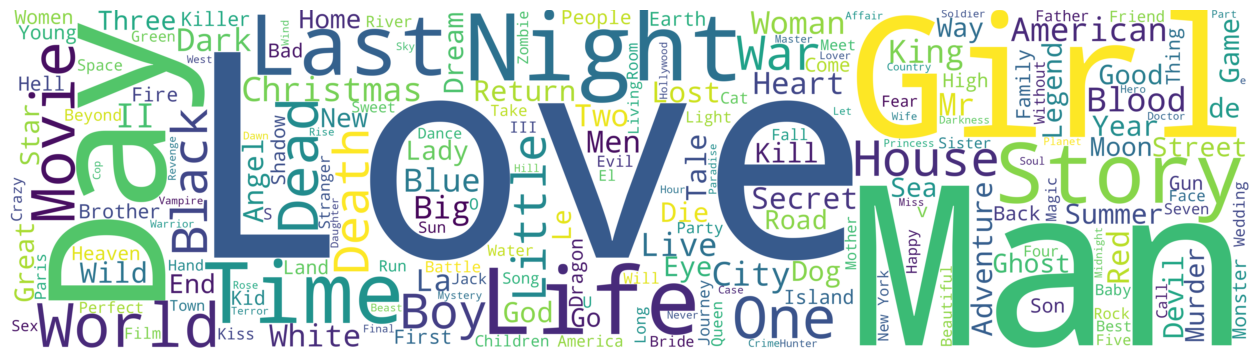

In [74]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

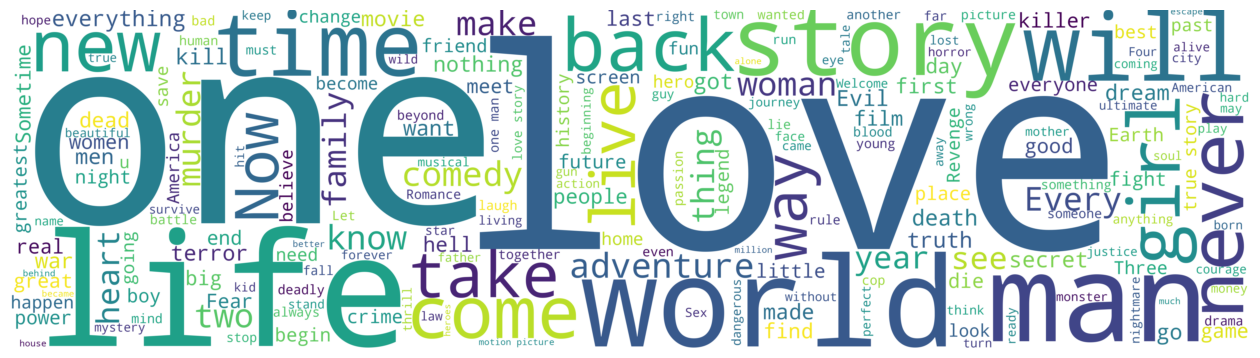

In [75]:
tagline_wordcloud = WordCloud(background_color='White',height=1500,width=5500,max_words=200).generate(tagline_corpus)
plt.figure(figsize=(16,8))
plt.imshow(tagline_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

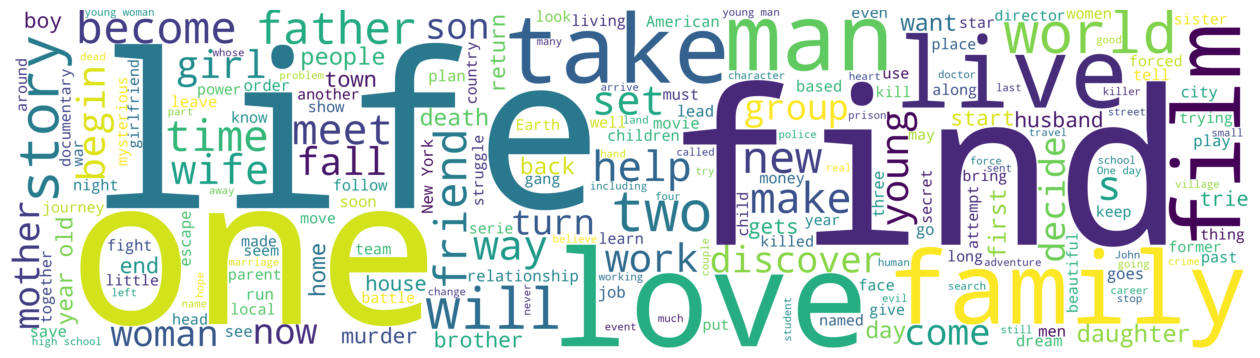

In [76]:
overview_wordcloud = WordCloud(background_color='White',height=1500,width=5500,max_words=200).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# ---------to be continued------